# Tomato Disease Classification


**-By RAJ MHATRE**

**This project aims to develop a machine learning model that can accurately predict the labels of images in a test dataset. This model could be used for a variety of tasks, such as image classification, object detection, and image segmentation.**

In [1]:
# Import necessary libraries for tomato disease classification using CNN:

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# The hyperparameters we have chosen are reasonable for a tomato disease classification project using CNN:

BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 25

In [3]:
# The code you have provided is used to load the PlantVillage dataset and pre-process it for training a CNN model:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4500 files belonging to 3 classes.


In [4]:
# # Get the integer label for a given class name:

class_names = dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [5]:
# Print the shape of the first batch of images and the corresponding labels from the dataset:

for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 2 2 1 1 2 0 0 0 1 0 1 1 2 0 0 0 1 0 1 0 2 2 2 1 2 1 2 2 2 2]


(32, 256, 256, 3)
[2 2 0 1 1 1 2 1 0 2 1 1 2 1 2 0 1 0 1 1 2 1 1 1 1 2 2 2 1 2 2 1]


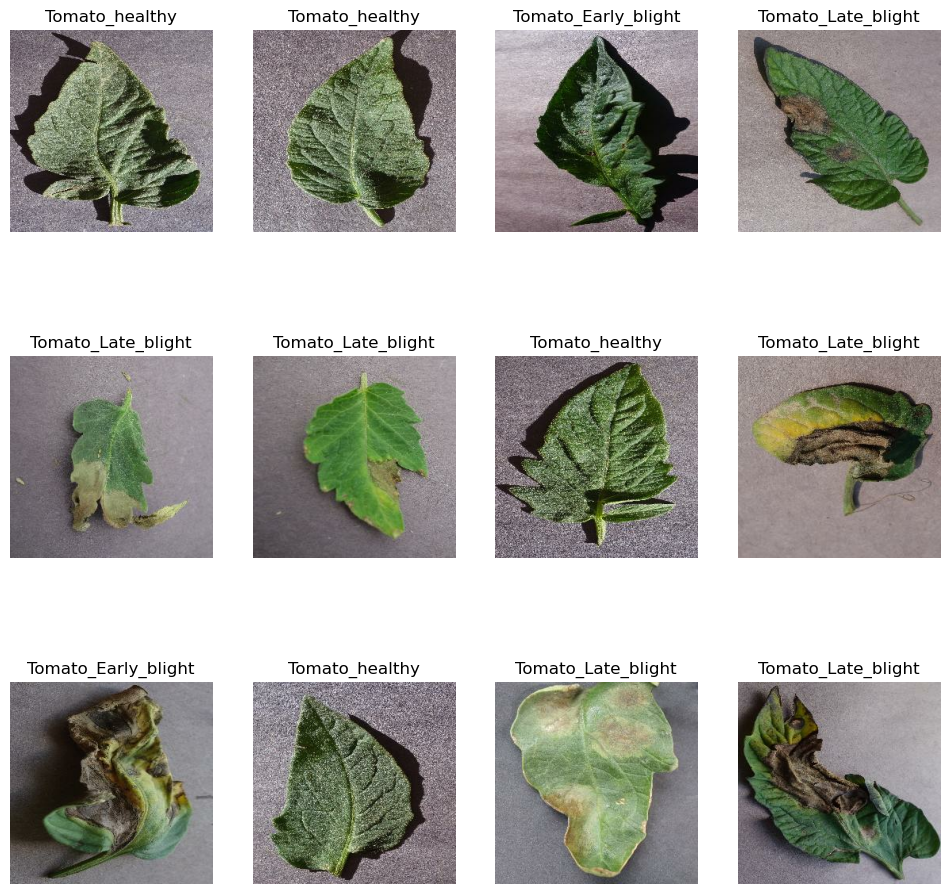

In [6]:
# Print the shape of the first batch of images and the corresponding labels from the dataset:

plt.figure(figsize=(12,12))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis(("off"))

In [7]:
# 80% ==> Training
# 10% ==> Validation
# 10% ==> Testing

In [8]:
# Split the dataset into training sets:

train_size = 0.8
len(dataset) 
# batch_size X len(dataset) = 16,032
# Total size of dataset in 32 batch = 501

141

In [9]:
# Split the dataset into training and validation sets:

ds = dataset
ds_size = len(ds)
ds_size

141

In [10]:
# train_size = 0.8
# len(dataset)*train_size

In [11]:
# train_ds = dataset.take(400)
# len(train_ds)

In [12]:
# test_ds = dataset.skip(400)
# len(test_ds)

In [13]:
# val_size = 0.1
# len(dataset)*val_size

In [14]:
# val_ds = test_ds.take(50)
# len(val_ds)

In [15]:
# test_ds = test_ds.skip(50)
# len(test_ds)

**Instead of this Creating a function:**

In [16]:
# get_dataset_partitions_tf() is a function for splitting a TensorFlow dataset into training, validation, and test sets:

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
# Applying function on split format:

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Training set: 80%
# Validation set: 10%
# Test set: 10%

In [18]:
# length of training dataset:

len(train_ds)

112

In [19]:
# length of testing dataset:

len(test_ds)

15

In [20]:
# length of validation dataset:

len(val_ds)

14

In [21]:
#  To cache, shuffle, and prefetch the training, validation, and test datasets:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
# Prints the first image in the dataset, after dividing it by 255:

for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.5568628  0.5137255  0.54509807]
  [0.58431375 0.5411765  0.57254905]
  [0.52156866 0.47843137 0.50980395]
  ...
  [0.47058824 0.41960785 0.44705883]
  [0.5254902  0.4745098  0.5019608 ]
  [0.44313726 0.39215687 0.41960785]]

 [[0.43529412 0.39215687 0.42352942]
  [0.5882353  0.54509807 0.5764706 ]
  [0.5921569  0.54901963 0.5803922 ]
  ...
  [0.64705884 0.59607846 0.62352943]
  [0.3254902  0.27450982 0.3019608 ]
  [0.57254905 0.52156866 0.54901963]]

 [[0.4392157  0.39607844 0.42745098]
  [0.63529414 0.5921569  0.62352943]
  [0.43137255 0.3882353  0.41960785]
  ...
  [0.54901963 0.49803922 0.5254902 ]
  [0.58431375 0.53333336 0.56078434]
  [0.6431373  0.5921569  0.61960787]]

 ...

 [[0.57254905 0.54509807 0.5764706 ]
  [0.4627451  0.43529412 0.46666667]
  [0.5372549  0.50980395 0.5411765 ]
  ...
  [0.5647059  0.5294118  0.54901963]
  [0.62352943 0.5882353  0.60784316]
  [0.7490196  0.7137255  0.73333335]]

 [[0.30980393 0.28235295 0.3137255 ]
  [0.56078434 0.53333336 0.5647059 ]


In [23]:
# Creates a TensorFlow Keras preprocessing model that resizes and rescales image:

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]
)

In [24]:
# Creates a TensorFlow Keras preprocessing model that performs data augmentation:

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# Data augmentation is a technique that can be used to improve the performance of machine learning models by artificially increasing the size of the training dataset.

In [25]:
# Variable specifies the shape of the input images to your CNN model:

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

# The input images are batches of 32 images, each with a width and height of 256 pixels and 3 color channels (red, green, and blue)

**The CNN model architecture that we have defined is a good starting point for tomato disease classification. It is a relatively simple model, but it should be able to achieve good results on the PlantVillage dataset.**

The build() method is used to initialize the weights of the model. This should be done before training the model.

Here is a breakdown of the model architecture:

Resize and rescale: This layer resizes and rescales the input images.
Conv2D: This layer performs a convolutional operation on the input images. The convolutional operation extracts features from the images.

MaxPooling2D: This layer performs max pooling on the output of the convolutional layer. Max pooling reduces the spatial dimensions of the feature maps while preserving the most important information.

Flatten: This layer flattens the output of the max pooling layer into a one-dimensional vector.

Dense: This layer is a fully connected layer. Fully connected layers are used to classify the input features.

The output layer of the model has a shape of (n_classes,), which is the same as the number of classes in the dataset. This means that the model will output a probability distribution over the n_classes classes for each input image.

In [26]:
# Convolutional neural network (CNN) model:

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [27]:
# Summary of the model architecture:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [28]:
# Compiles the CNN model using the Adam optimizer, the sparse categorical crossentropy loss function, and the accuracy metric:

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

**Adam optimizer: The Adam optimizer is a popular stochastic gradient descent (SGD) optimizer that is often used for training machine learning models.**

**Sparse categorical crossentropy loss function: The sparse categorical crossentropy loss function is a commonly used loss function for multiclass classification problems.**

**Accuracy metric: The accuracy metric is a commonly used metric for evaluating the performance of classification models.**

In [29]:
# Trains the CNN model on the training dataset for EPOCHS epochs, using a batch size of BATCH_SIZE:

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
 )

Epoch 1/25
112/112 [==============================] - 385s 3s/step - loss: 0.7149 - accuracy: 0.6705 - val_loss: 0.3688 - val_accuracy: 0.8415
Epoch 2/25
112/112 [==============================] - 340s 3s/step - loss: 0.3617 - accuracy: 0.8446 - val_loss: 0.2721 - val_accuracy: 0.8750
Epoch 3/25
112/112 [==============================] - 176s 2s/step - loss: 0.4735 - accuracy: 0.7979 - val_loss: 0.3218 - val_accuracy: 0.8549
Epoch 4/25
112/112 [==============================] - 113s 1s/step - loss: 0.2817 - accuracy: 0.8819 - val_loss: 0.2058 - val_accuracy: 0.9152
Epoch 5/25
112/112 [==============================] - 103s 921ms/step - loss: 0.2395 - accuracy: 0.9073 - val_loss: 0.3478 - val_accuracy: 0.8616
Epoch 6/25
112/112 [==============================] - 103s 918ms/step - loss: 0.2152 - accuracy: 0.9155 - val_loss: 0.2195 - val_accuracy: 0.9152
Epoch 7/25
112/112 [==============================] - 103s 921ms/step - loss: 0.1910 - accuracy: 0.9247 - val_loss: 0.3610 - val_accurac

In [30]:
# Evaluates the trained CNN model on the test dataset:

scores = model.evaluate(test_ds)

15/15 [==============================] - 5s 221ms/step - loss: 0.0715 - accuracy: 0.9917


In [31]:
# Evaluates the trained CNN model on the test dataset and returns a list of scores:

scores

[0.07149145007133484, 0.9916666746139526]

In [32]:
# Understanding the training process:

history

In [33]:
# Hyperparameters used to train the model:

history.params

{'verbose': 1, 'epochs': 25, 'steps': 112}

In [34]:
# Contains the training history metrics, such as loss, accuracy, and validation loss:

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
# Datatype of history, list of floating-point values and one for each epoch of training:

type(history.history['loss'])

list

In [36]:
# The length of history.history['loss'] is the number of epochs that the model was trained for:

len(history.history['loss'])

25

In [37]:
# The code history.history['loss'][:5] returns the first five elements of the history.history['loss'] list:

history.history['loss'][:5] # show loss for first 5 epochs

[0.7149072885513306,
 0.3617219924926758,
 0.4735422730445862,
 0.2817193865776062,
 0.23950952291488647]

In [38]:
# Assigns the following variables:

# acc: The training accuracy.
# val_acc: The validation accuracy.
# loss: The training loss.
# val_loss: The validation loss.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

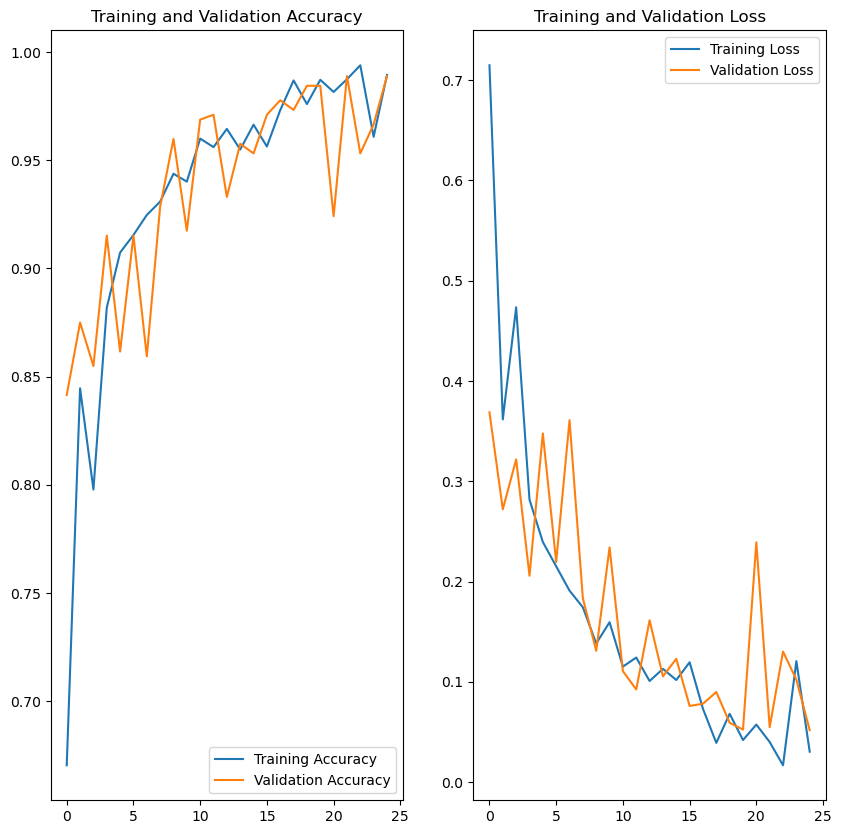

In [39]:
# creates a figure with two subplots and plots the training and validation accuracy and loss curves on each subplot, respectively.
# The figure size is set to (10, 10) and the subplots are arranged in a 1x2 grid:

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_healthy
1/1 [==============================] - 0s 392ms/step
predicted label: Tomato_healthy


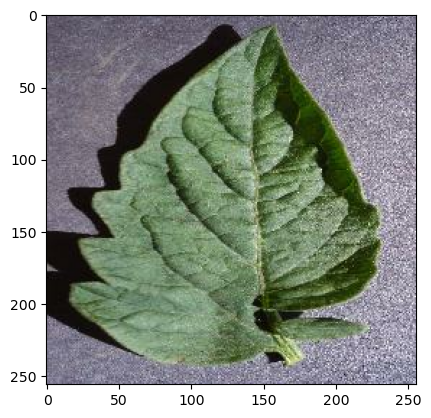

In [40]:
# Run prediction on a sample image:
# loads a batch of images from the test dataset and predicts the label of the first image in the batch.
# The predicted label is then compared to the actual label of the image:

import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [41]:
# Write a function for inference:
# takes a trained model and an image as input and returns the predicted class and confidence for the image:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 110ms/step


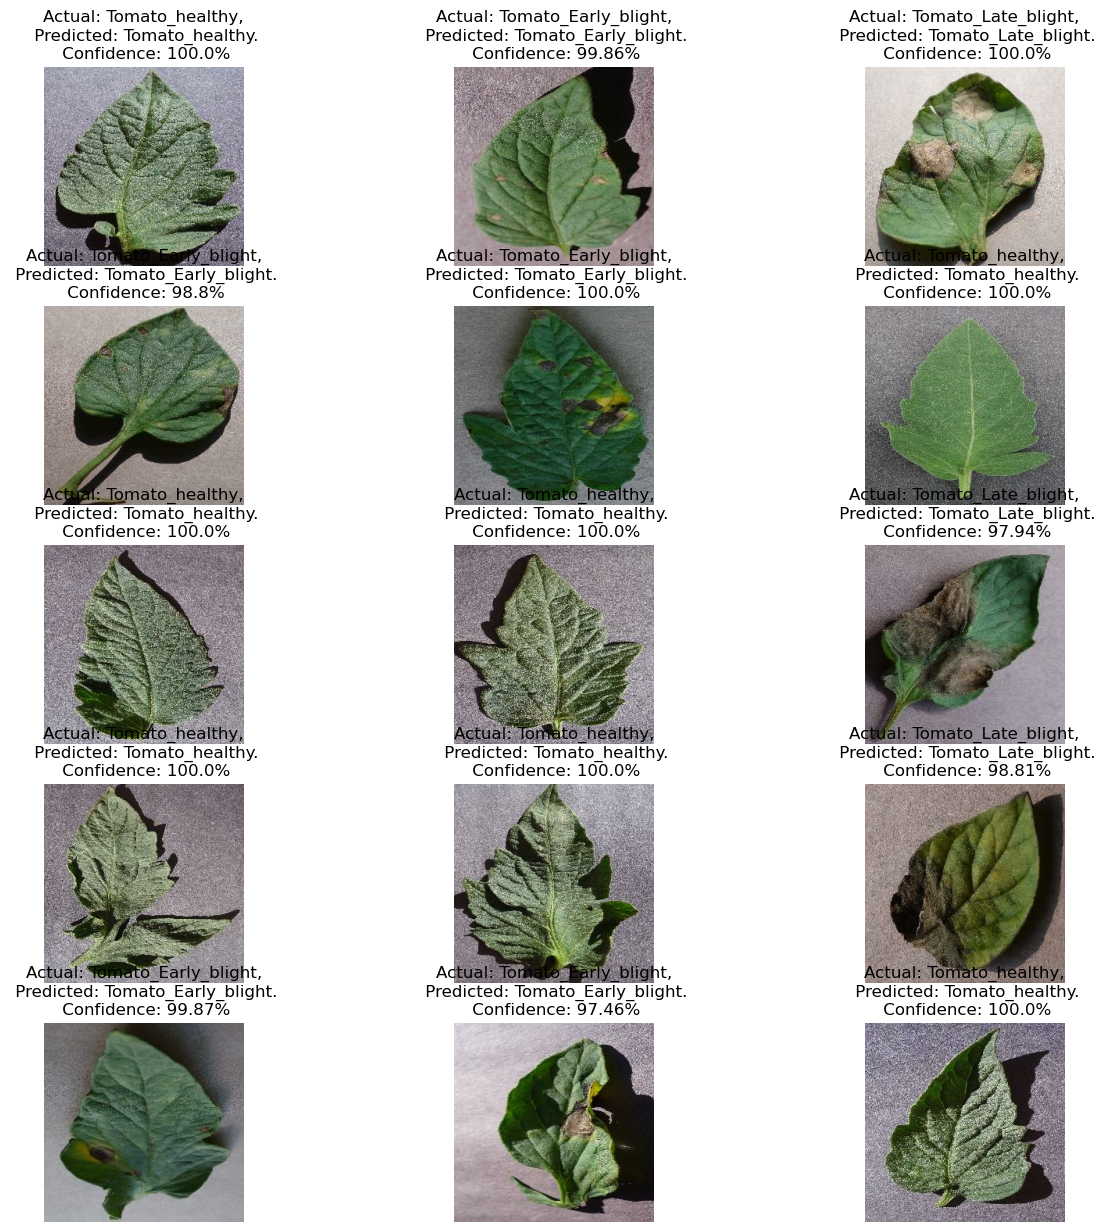

In [42]:
# Now run inference on few sample images:
# creates a figure with 15 subplots and plots an image from the test dataset in each subplot.
# The predicted and actual labels of the image are displayed in the title of each subplot, along with the confidence of the predicted label:

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(15):
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")